In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "3" 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Part 1: Train on a simulated stream

In [2]:
save_folder = "test_simulated"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

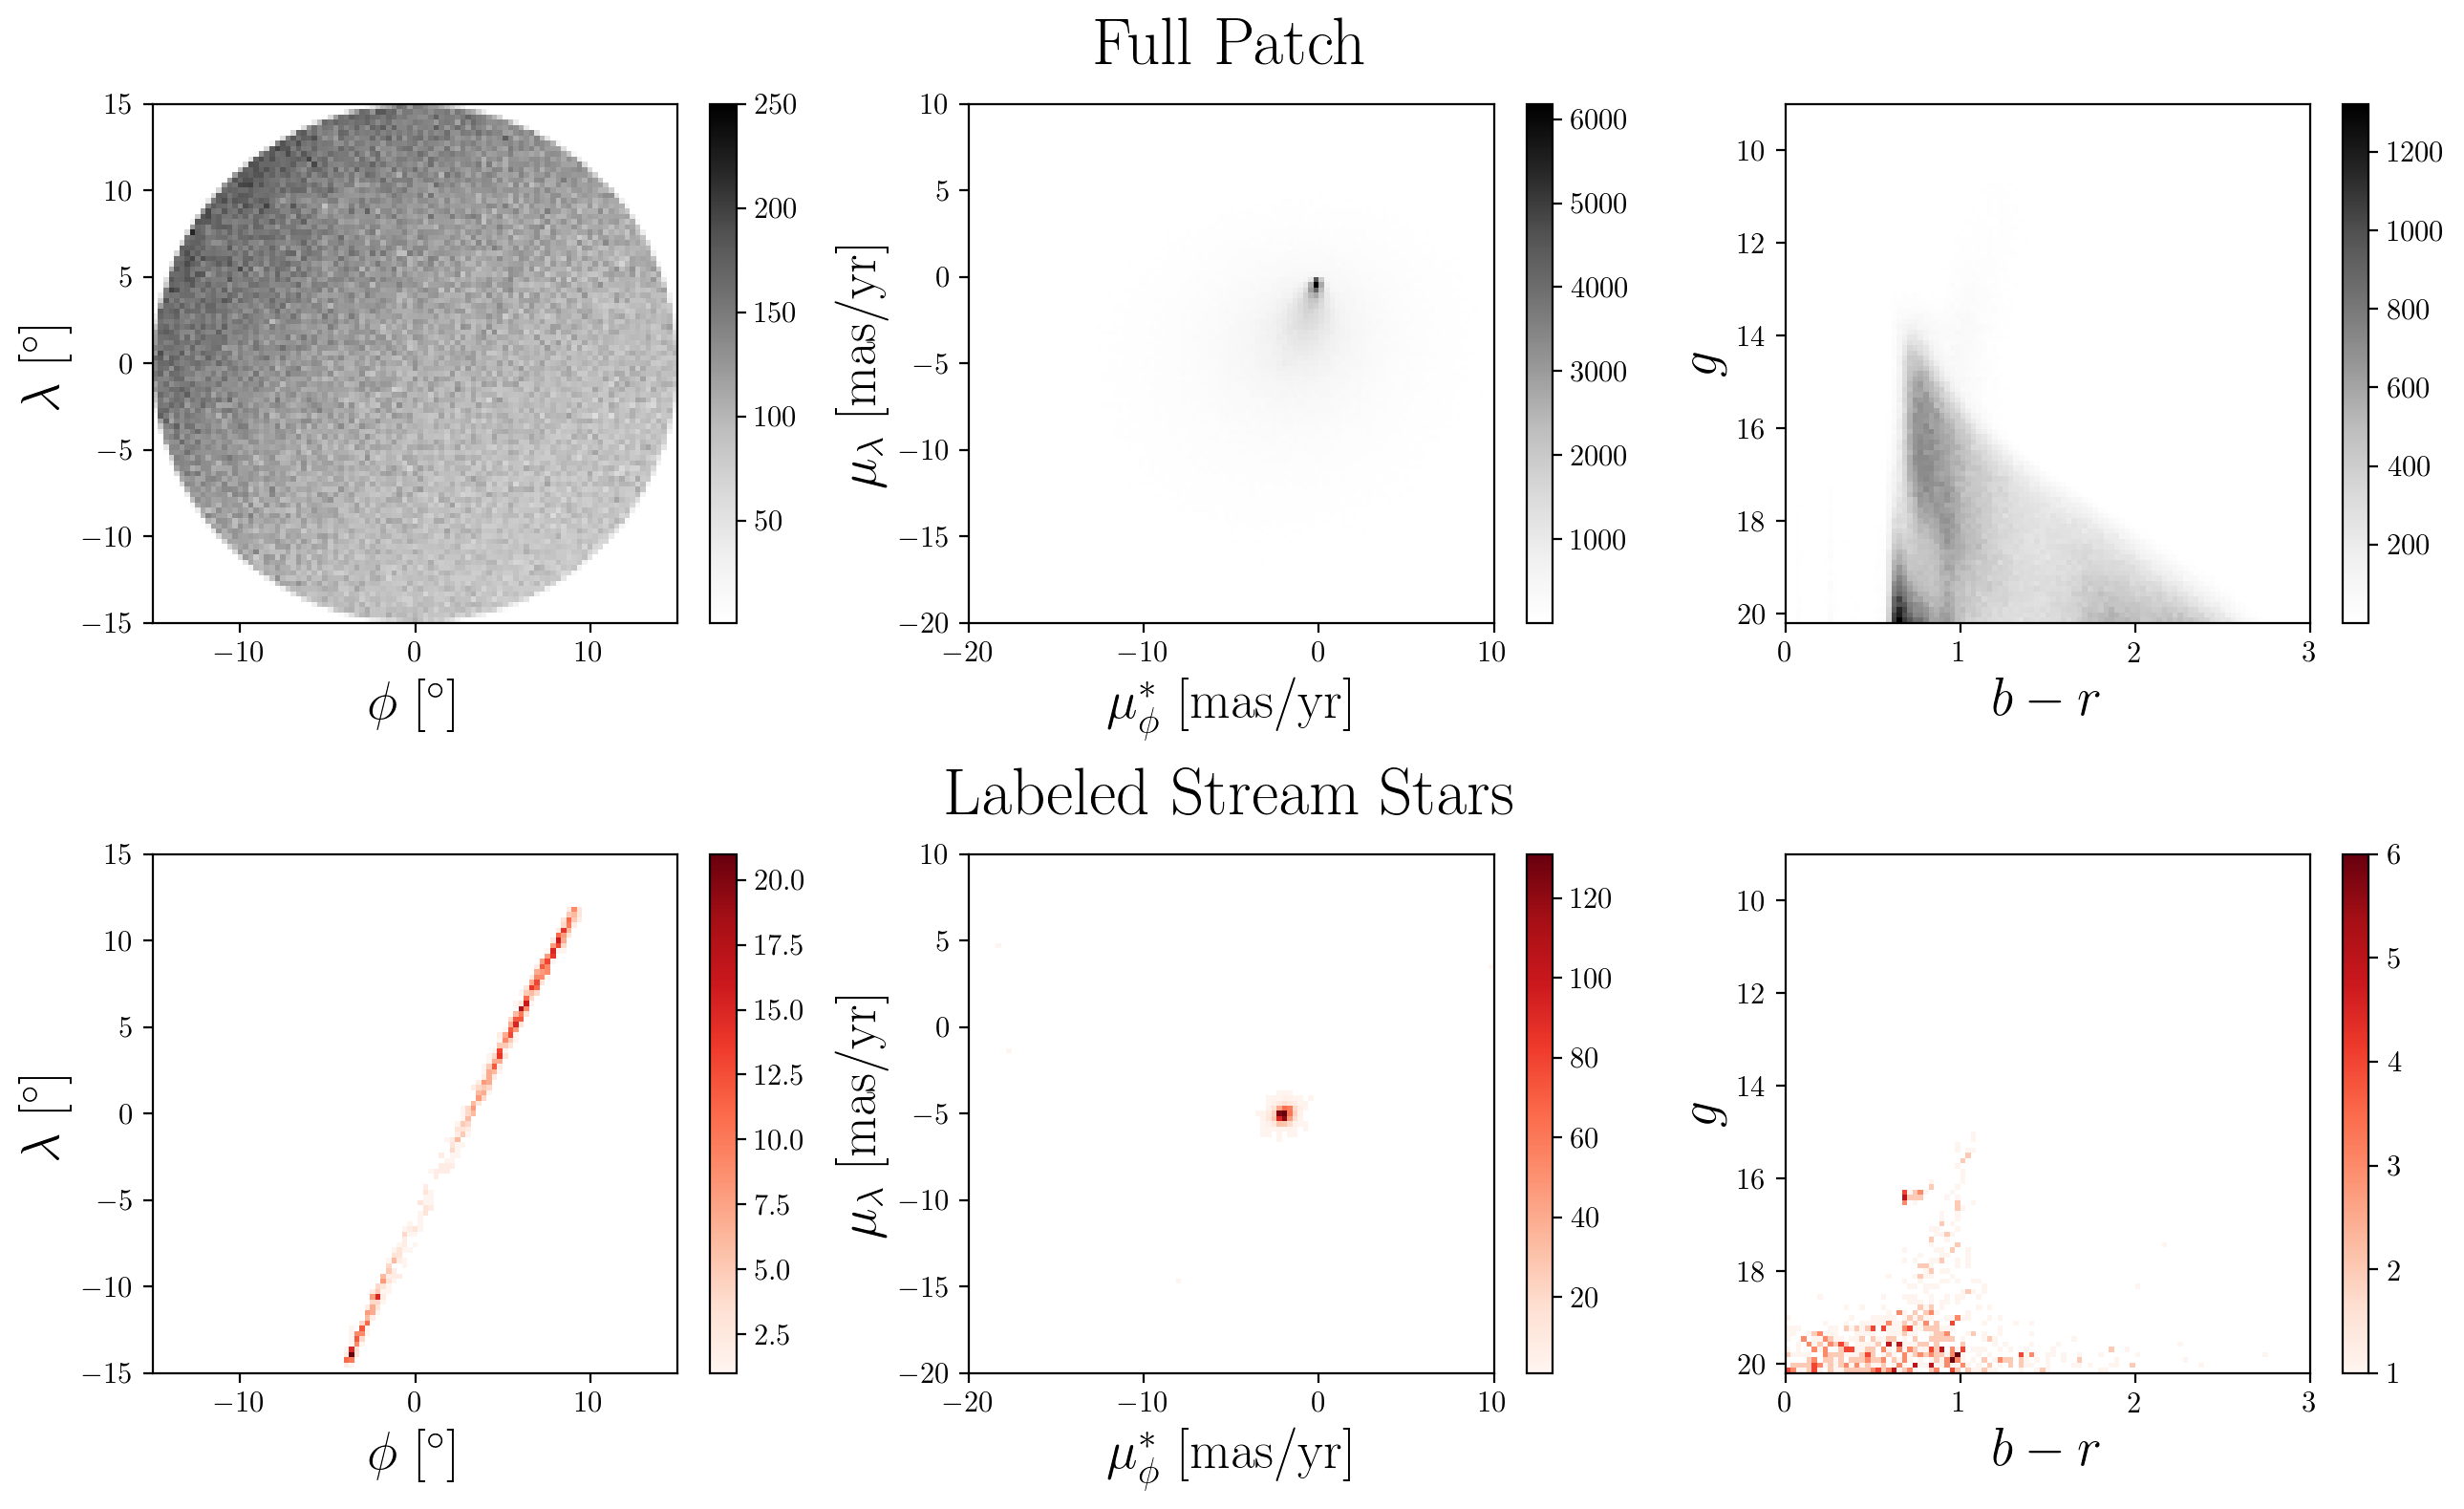

In [3]:
### Load file 
df = pd.read_hdf("../gaia_data/simulated_patch.h5")
make_plots(df, save_folder = save_folder)

SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-7.6,-6.3) & (-3.8,-2.6]
Signal region: [-6.3,-3.8]
Total counts: SR = 175,789, SB = 171,400
Signal region has 1,124 stream and 174,665 bkg events (0.64%).
Sideband region has 1,127 stream and 346,062 bkg events (0.33%).
f_sig = 2.0X f_sideband.


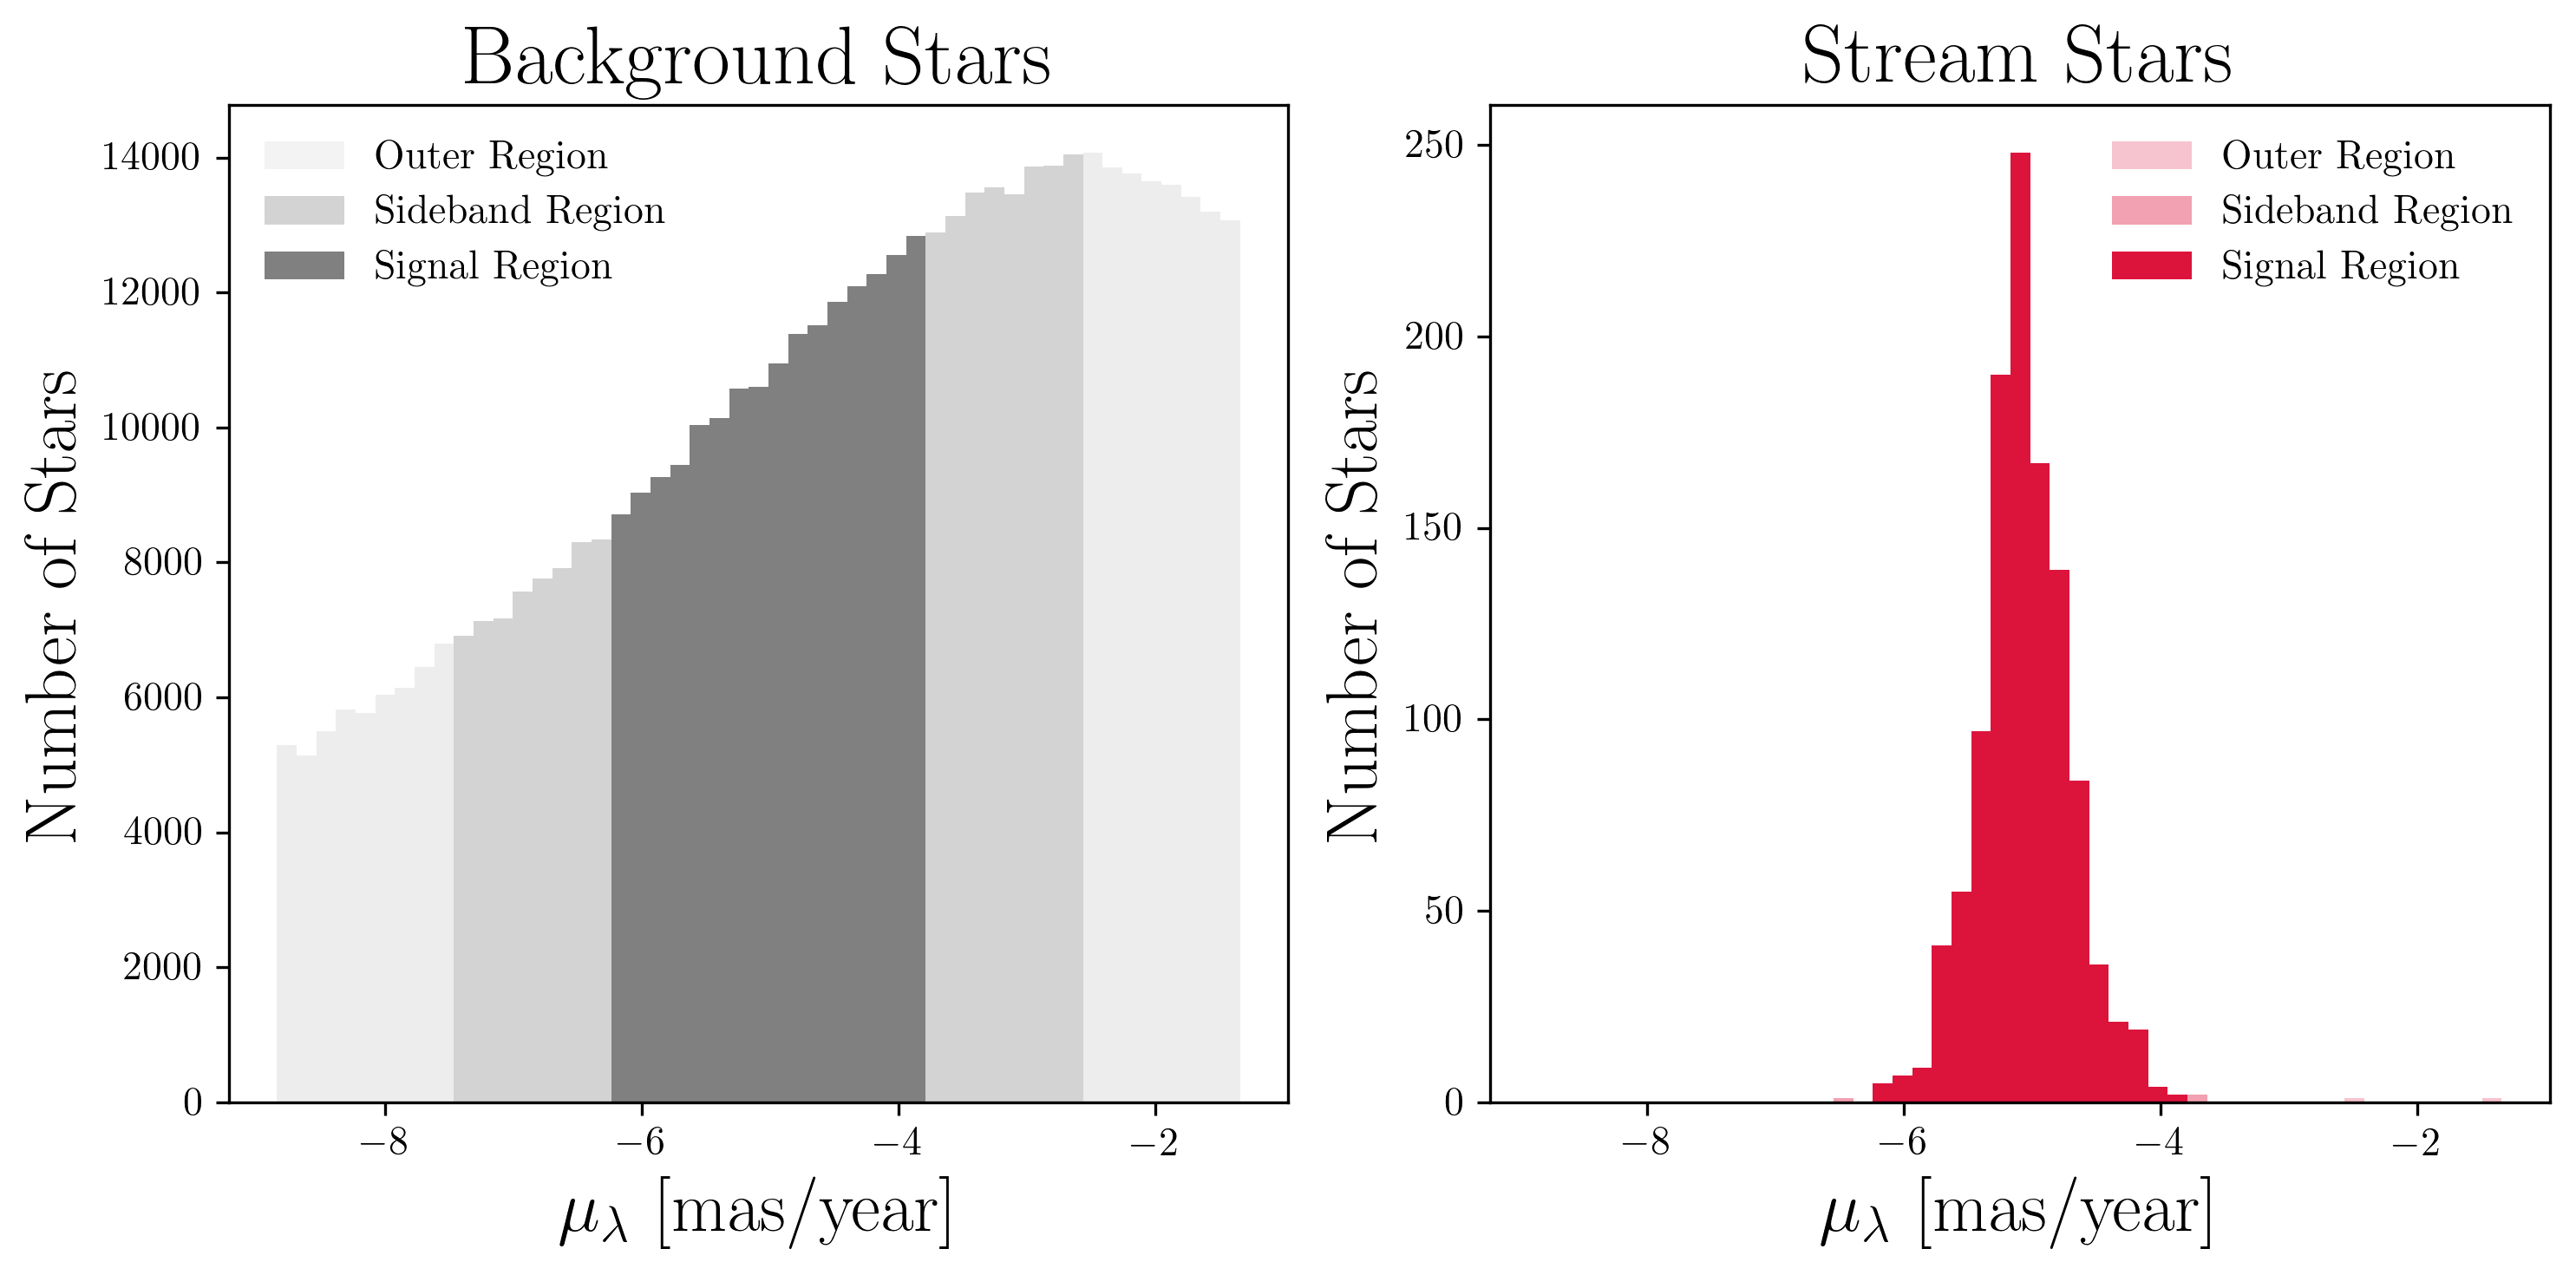

In [4]:
### Divide into signal & sideband regions. Note that these tend to be much narrower than for real streams
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)

2023-05-04 17:20:22.835290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 17:20:23.322719: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37586 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6
2023-05-04 17:20:24.485075: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2170/2170 [==============================] - 3s 1ms/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 2s 979us/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 3s 1ms/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 3s 2ms/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 3s 1ms/step
Plotting results before fiducial cuts...


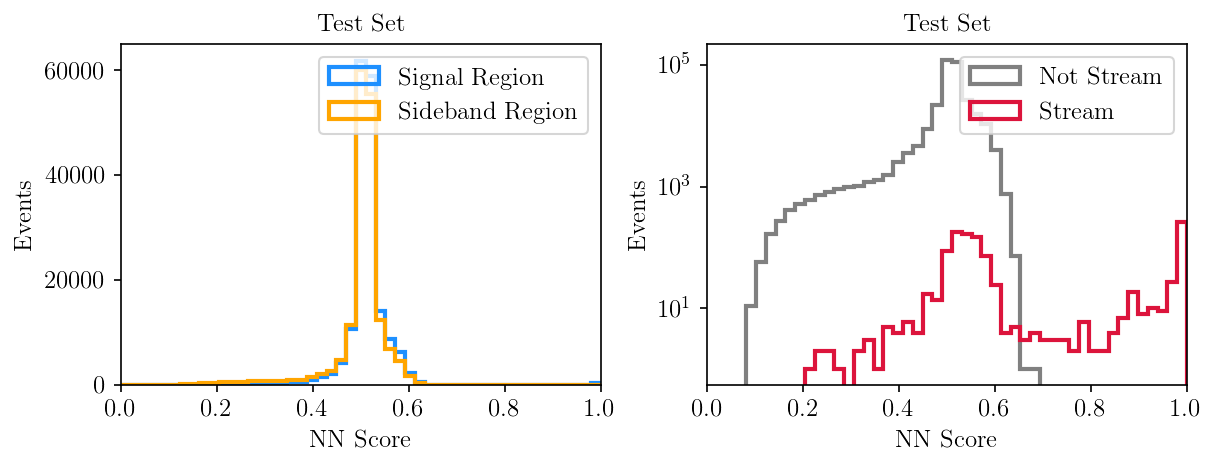

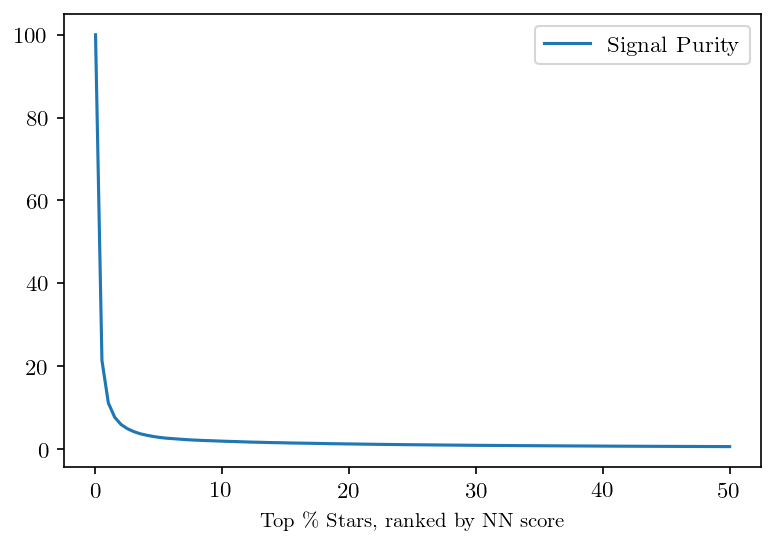

Top 50 stars: Purity = 100.0% 


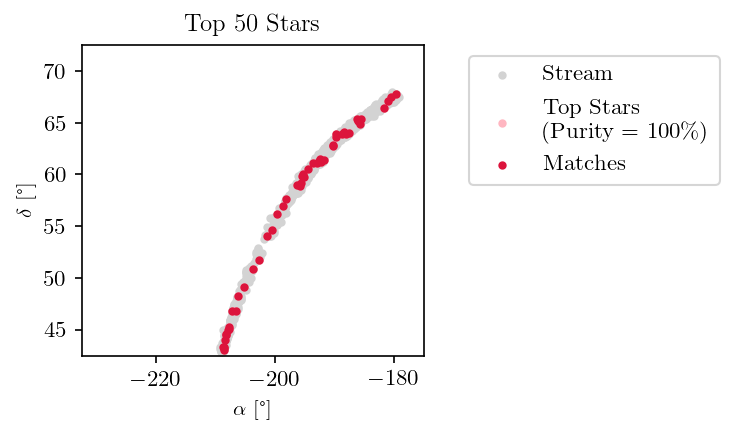

Top 100 stars: Purity = 100.0% 


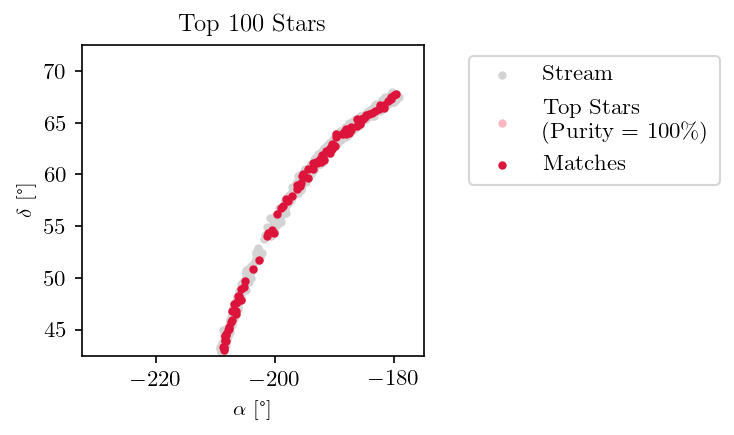

In [5]:
### Train (takes ~15 minutes to run on a GPU)
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, apply_cuts = False, save_folder = save_folder)

# Part 2: Train on a real patch of the GD-1 stream

In [6]:
save_folder = "test_gd1"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

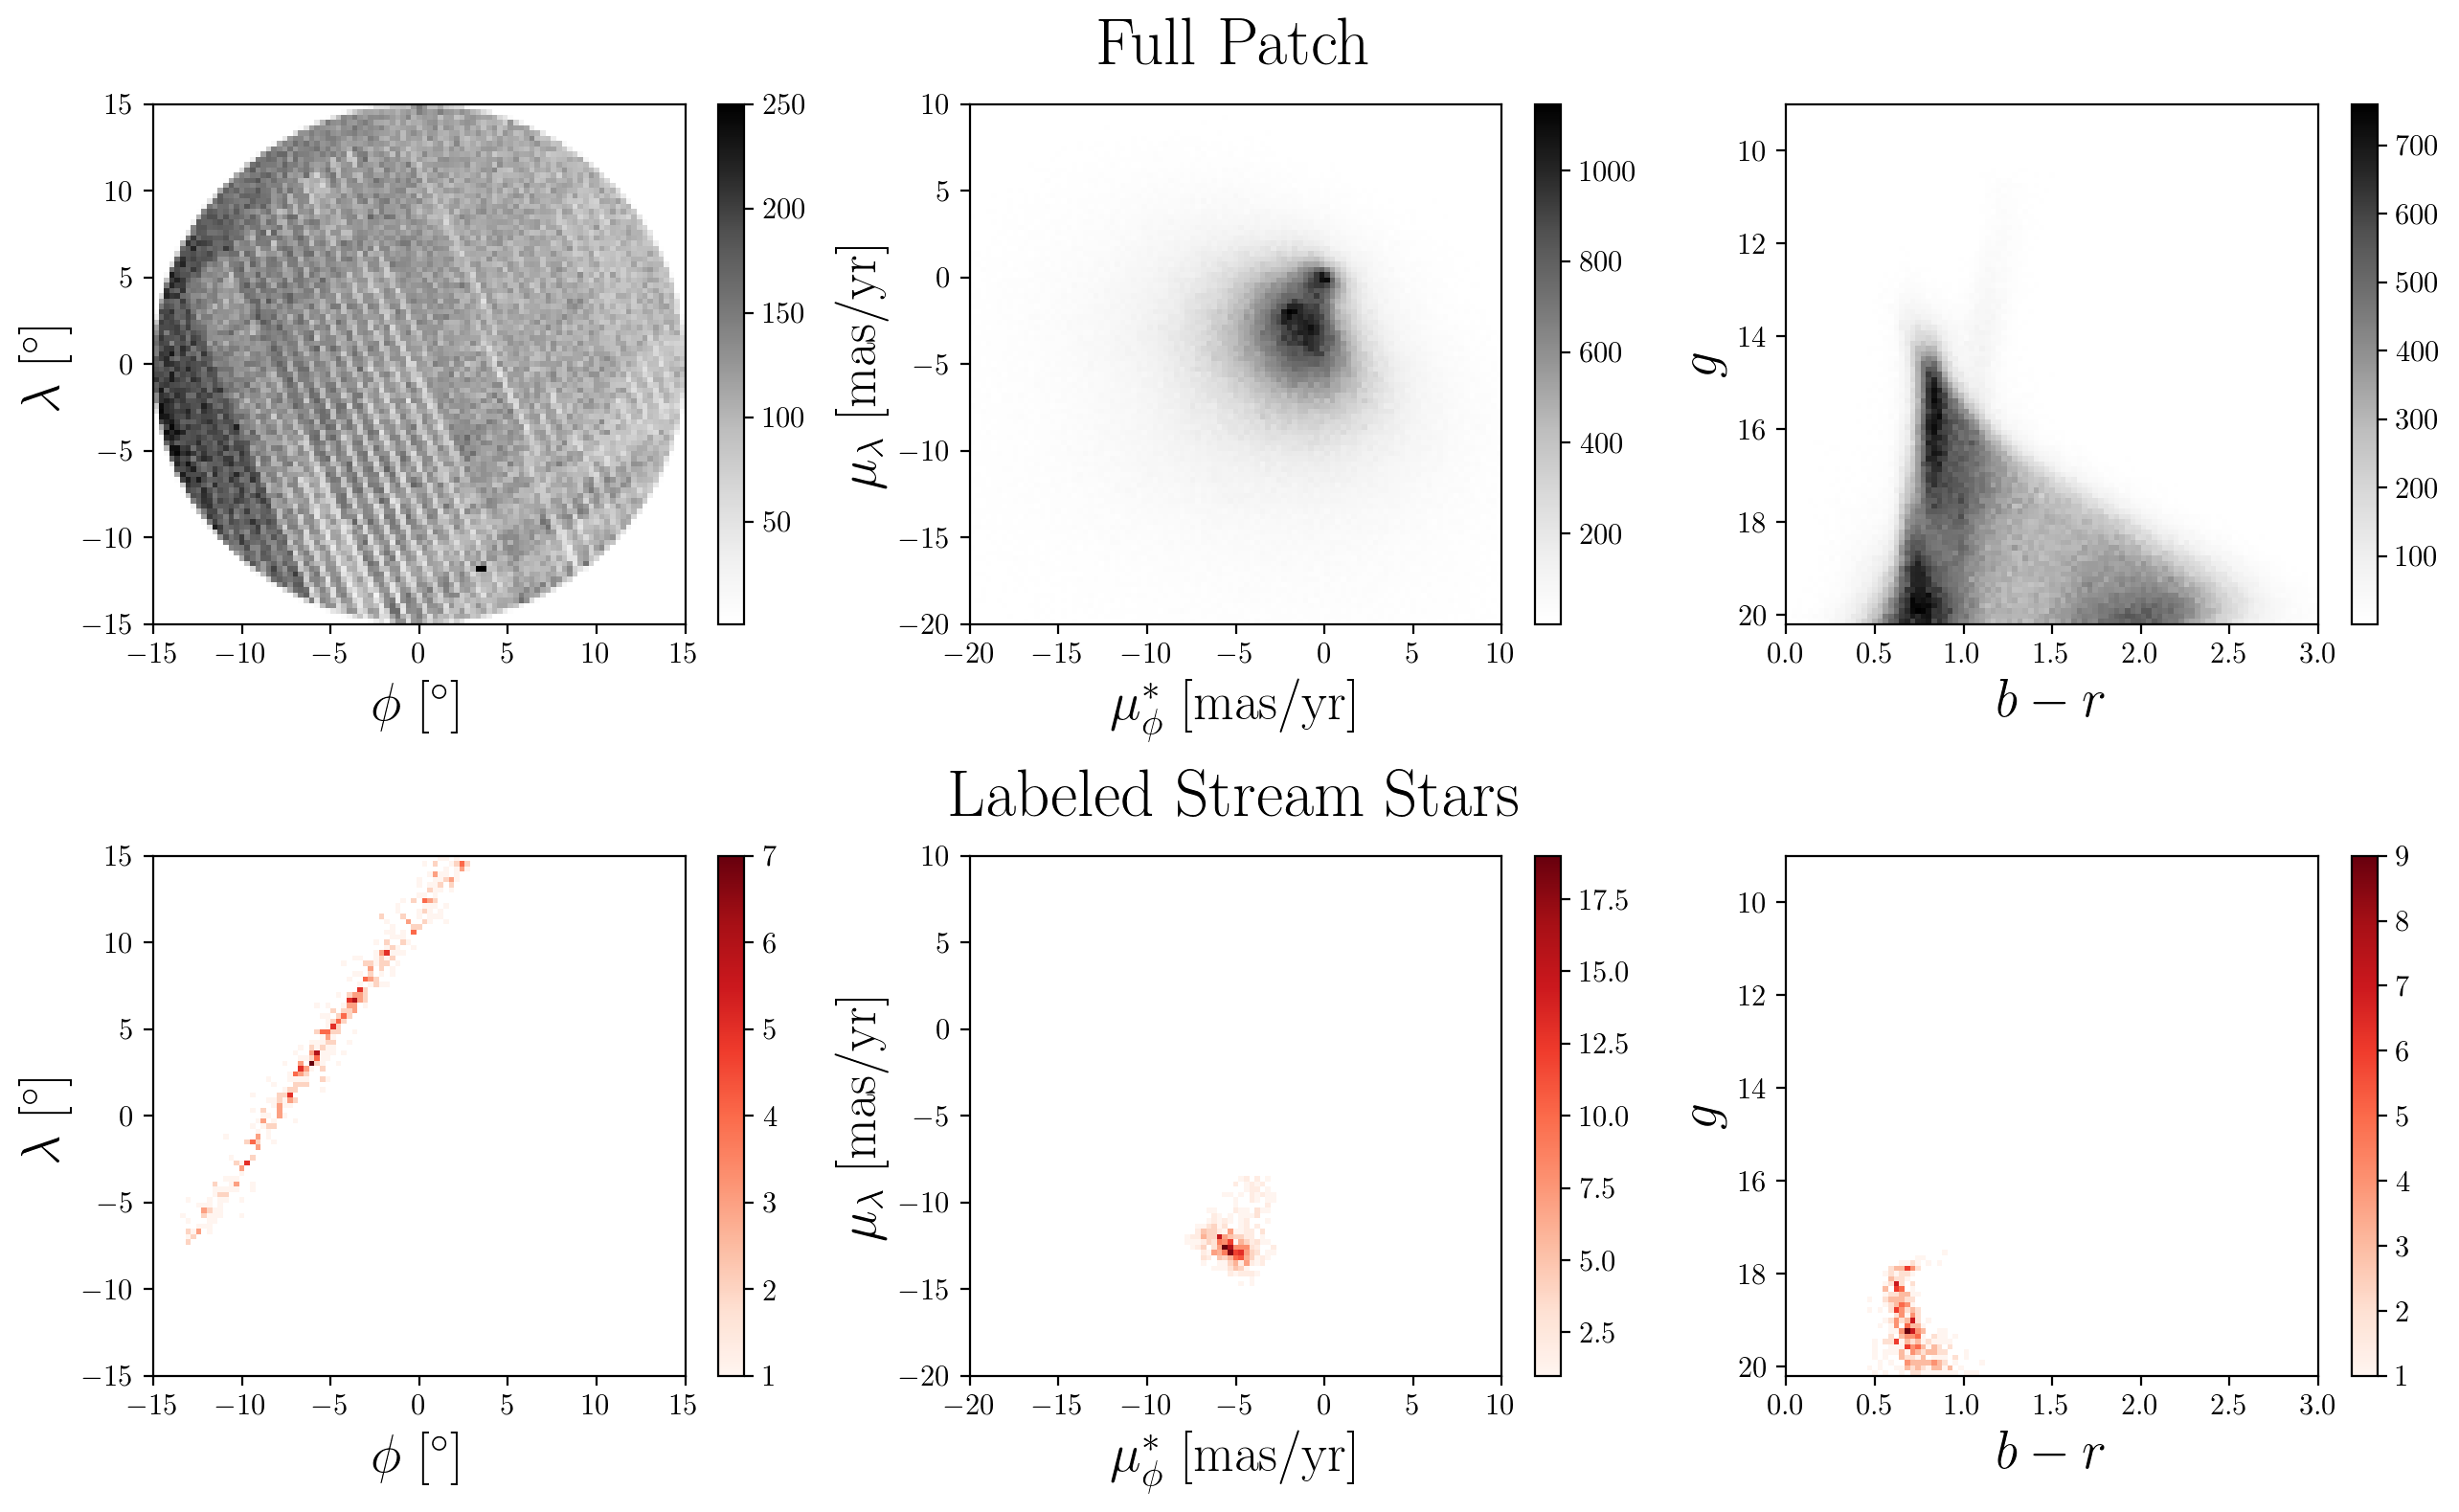

In [7]:
### Load file 
df = pd.read_hdf("../gaia_data/gd1_1_patch.h5")
make_plots(df, save_folder = save_folder)

SR factor: 1
SB factor: 3
Scanning over μ_λ
Sideband region: [-15.9,-13.6) & (-11.4,-9.1]
Signal region: [-13.6,-11.4]
Total counts: SR = 44,017, SB = 95,615
Signal region has 412 stream and 43,605 bkg events (0.94%).
Sideband region has 503 stream and 139,129 bkg events (0.36%).
f_sig = 2.6X f_sideband.


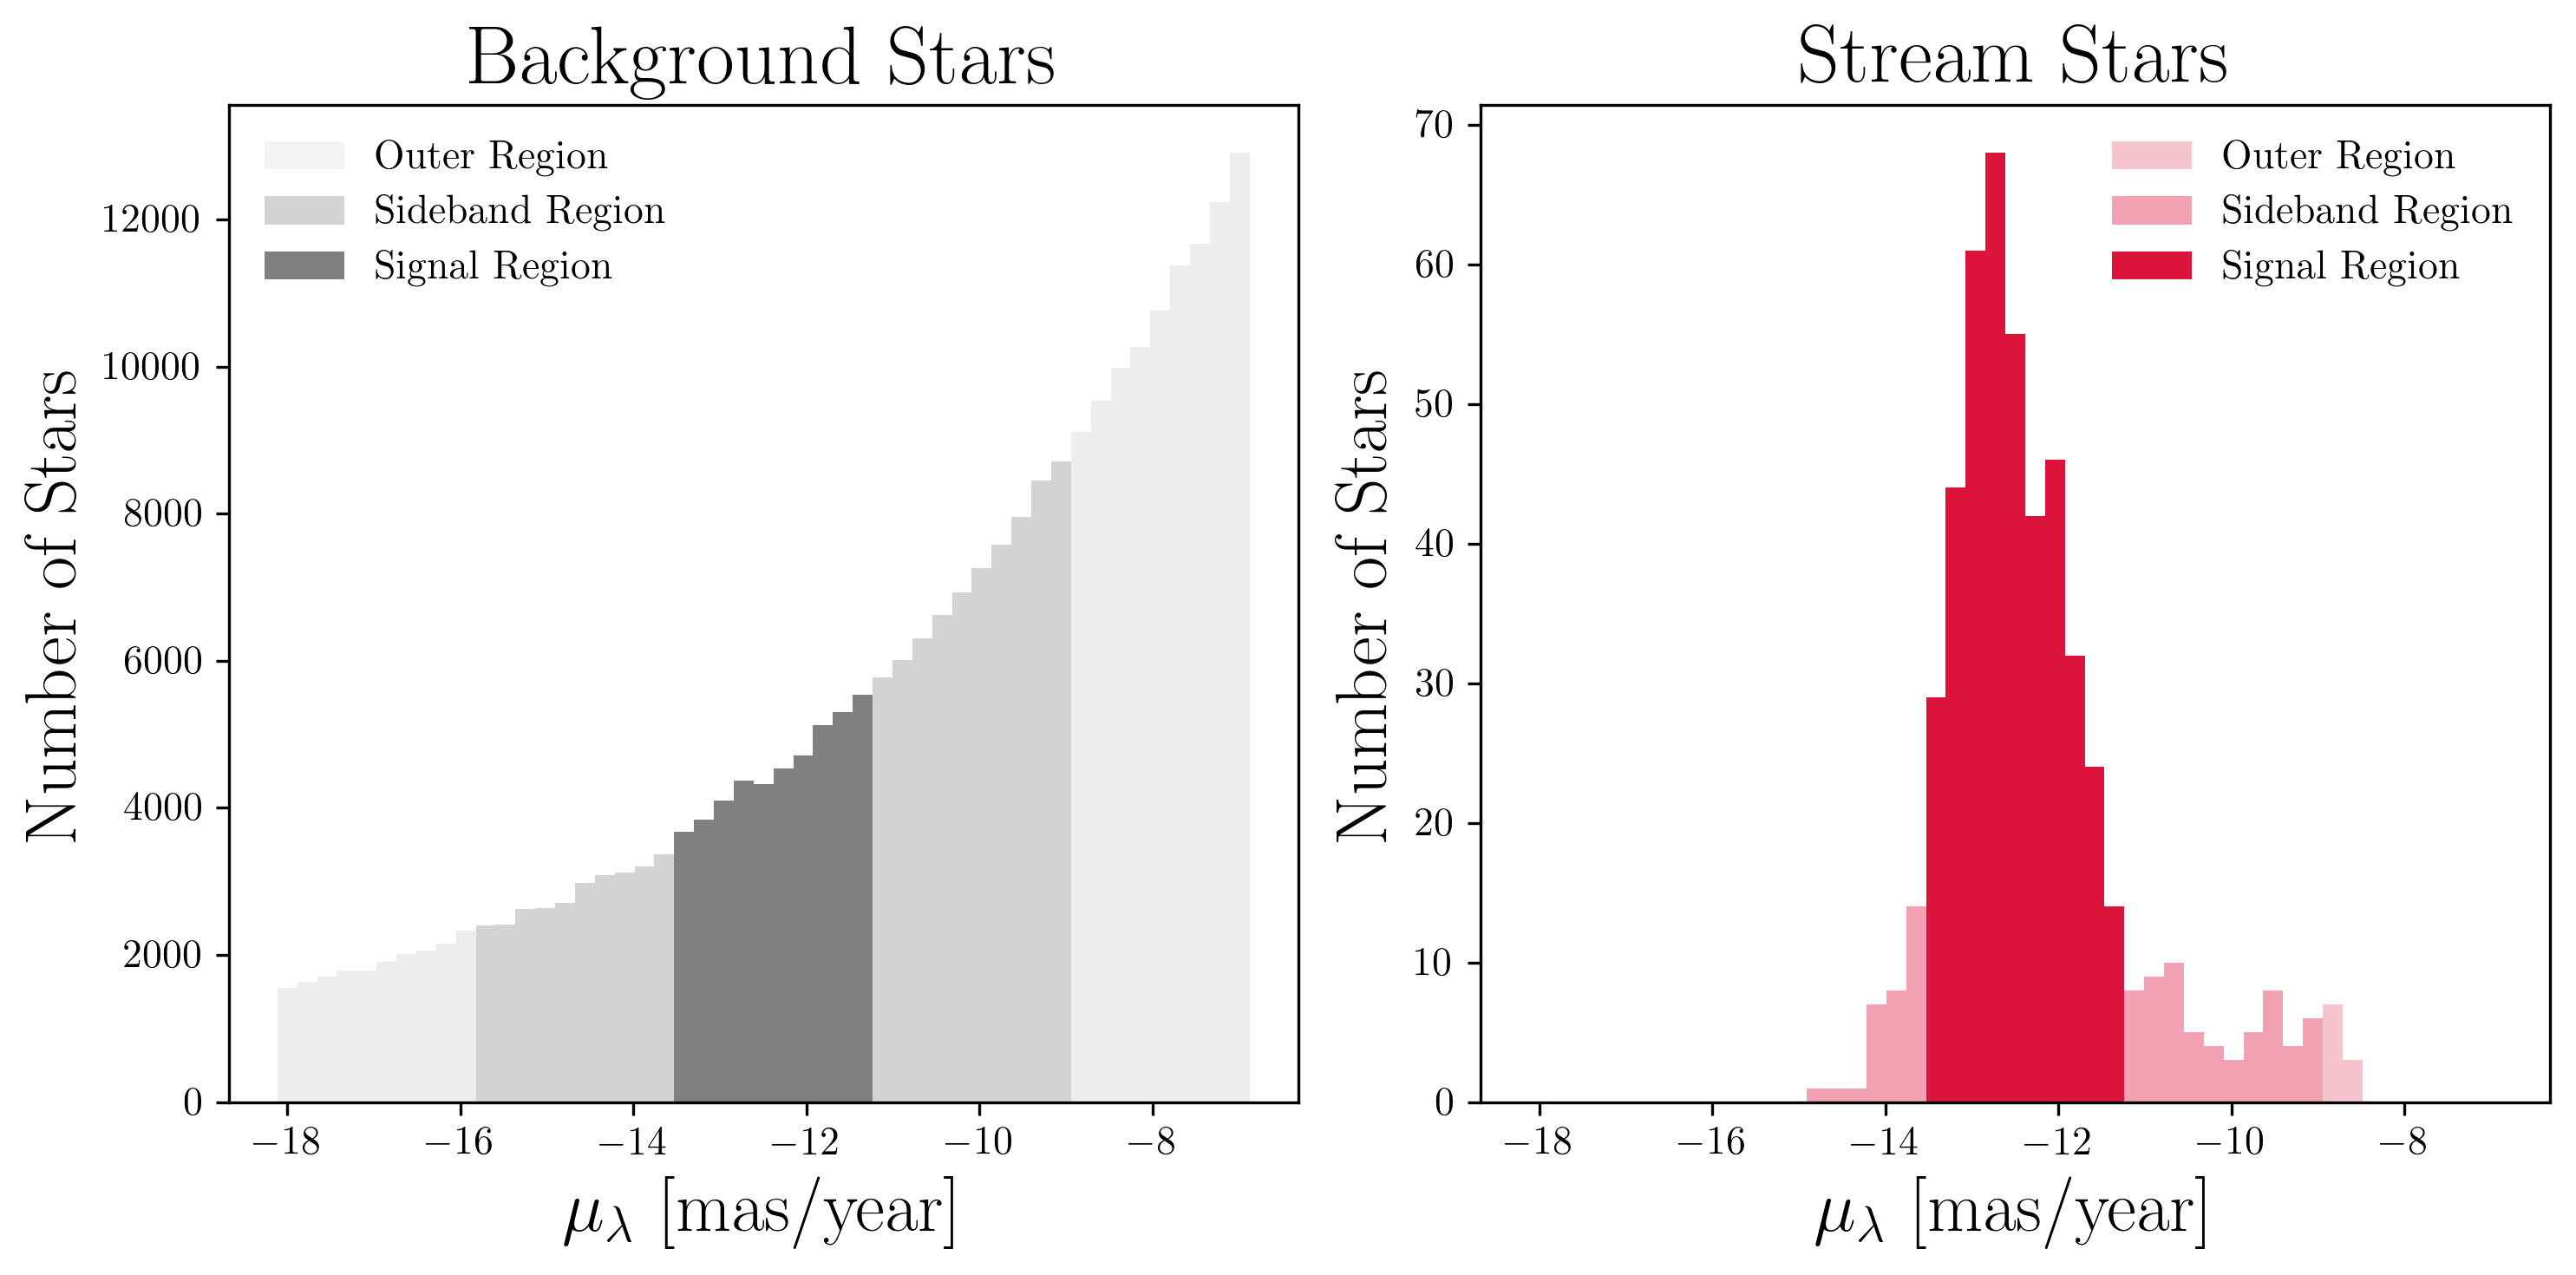

In [8]:
### Divide into signal & sideband regions
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=1, sb_factor=3)

873/873 [==============================] - 1s 2ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 2ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


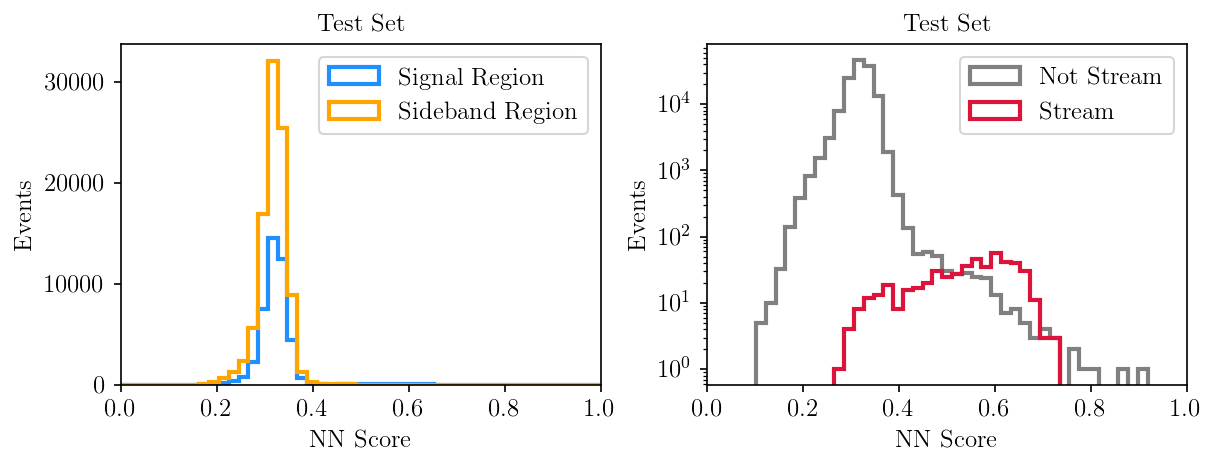

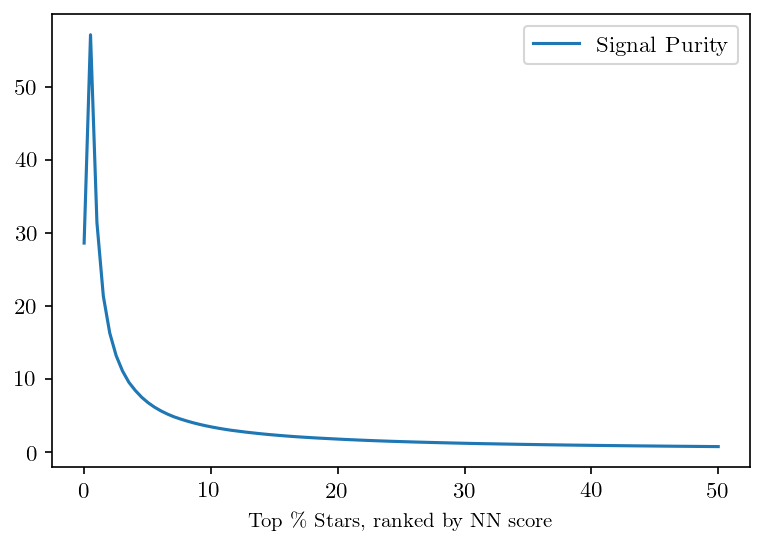

Top 50 stars: Purity = 62.0% 


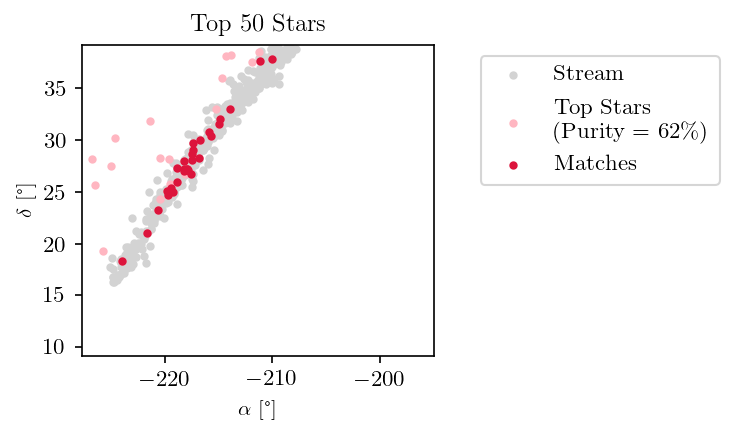

Top 100 stars: Purity = 75.0% 


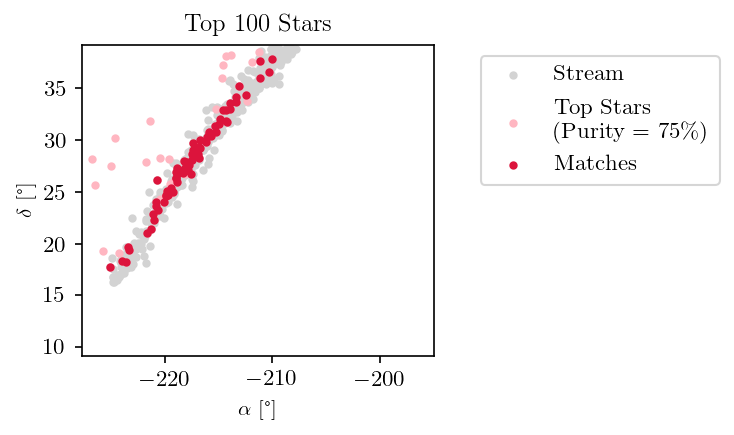

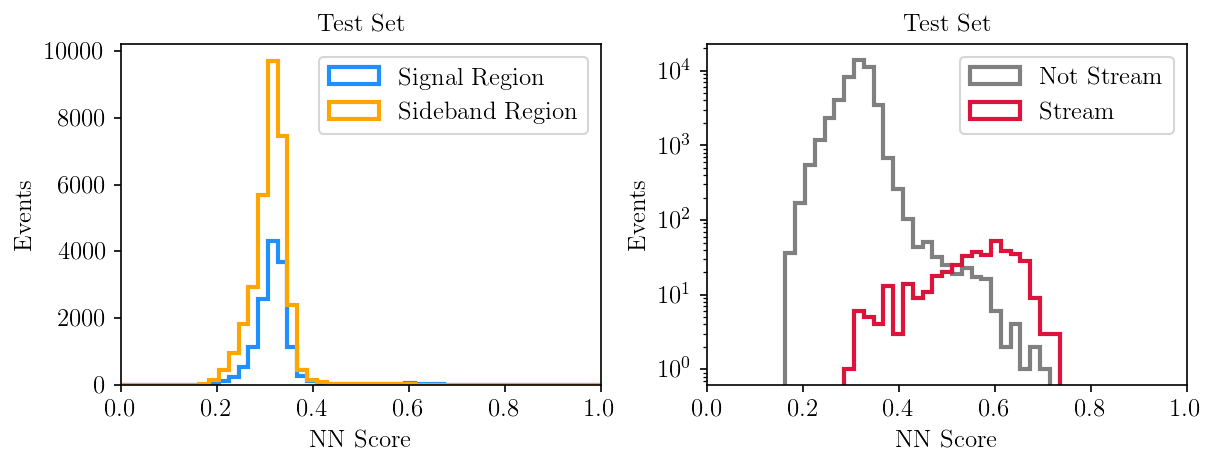

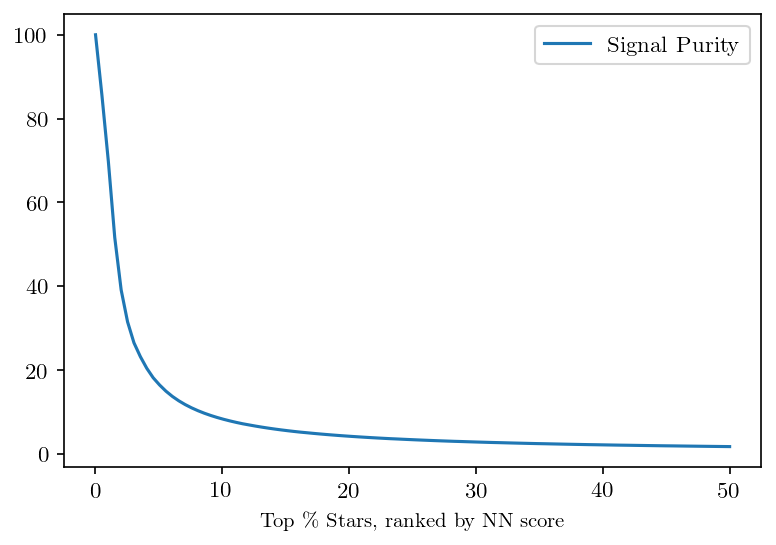

Top 50 stars: Purity = 92.0% 


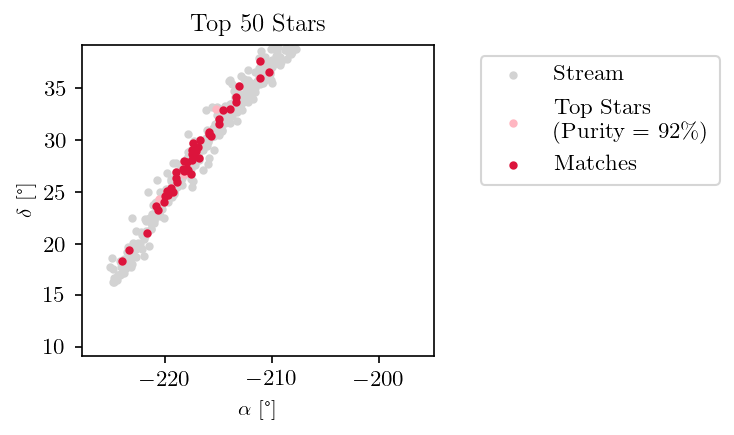

Top 100 stars: Purity = 91.0% 


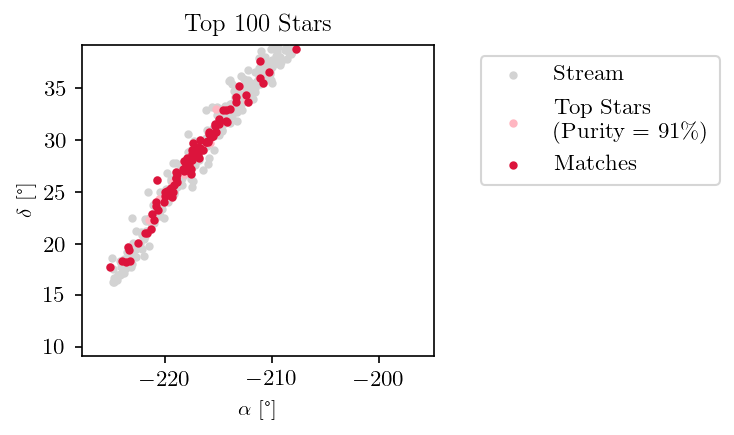

In [9]:
### Train 
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, save_folder = save_folder)